### **Tarea: Optimización del Tamaño de un Lote en Aprendizaje Automático** ###

Mstemáticas y Estadística para Inteligencia Artificial

**Alumno**: Aminadab Córdova Acosta

In [2]:
# Librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, solve, Eq, lambdify


In [3]:
# Definir variables simbólicas
B = symbols('B', real=True, positive=True)
N_total, t0, c = symbols('N_total t0 c', real=True, positive=True)

# Definir la función T(B)
t_B = t0 + (c / N_total) * B**3
T_B = (N_total / B) * t_B

# Derivada de T(B)
dT_dB = diff(T_B, B) # Primera derivada

# Encontrar el valor óptimo de B (filtrando la solución positiva)
B_opt_solutions = solve(Eq(dT_dB, 0), B) # Soluciones crítica
B_opt = [sol.evalf() for sol in B_opt_solutions if sol.is_real and sol > 0][0] # Filtrado de soluciones reales y positivas

In [4]:
B_opt_solutions

[2**(2/3)*N_total**(1/3)*t0**(1/3)/(2*c**(1/3))]

In [5]:
B_opt 

0.7937005259841*N_total**0.333333333333333*t0**0.333333333333333/c**0.333333333333333

In [ ]:
#Verificar si es un mínimo (d²T/dB² > 0)  #
d2T_dB2 = diff(T_B, B, 2)  # Segunda derivada
second_deriv_at_opt = d2T_dB2.subs(B, B_opt).simplify()  # Evaluada en B_opt

print(f"\n2. Condición de segunda derivada:")
print(f"   d²T/dB²(B_opt) = {second_deriv_at_opt.simplify()}")
print(f"   → Es un {'MÍNIMO' if second_deriv_at_opt > 0 else 'MÁXIMO'} (porque la segunda derivada es {'positiva' if second_deriv_at_opt > 0 else 'negativa'}).")


2. Condición de segunda derivada:
   d²T/dB²(B_opt) = 6.0*c**1.0
   → Es un MÍNIMO (porque la segunda derivada es positiva).


La segunda derivada de una función en un punto crítico nos indica la curvatura de la función en ese punto.

Si ( d^2T/dB^2 > 0 ), la función tiene una curvatura hacia arriba en ese punto, lo que significa que es un mínimo local.

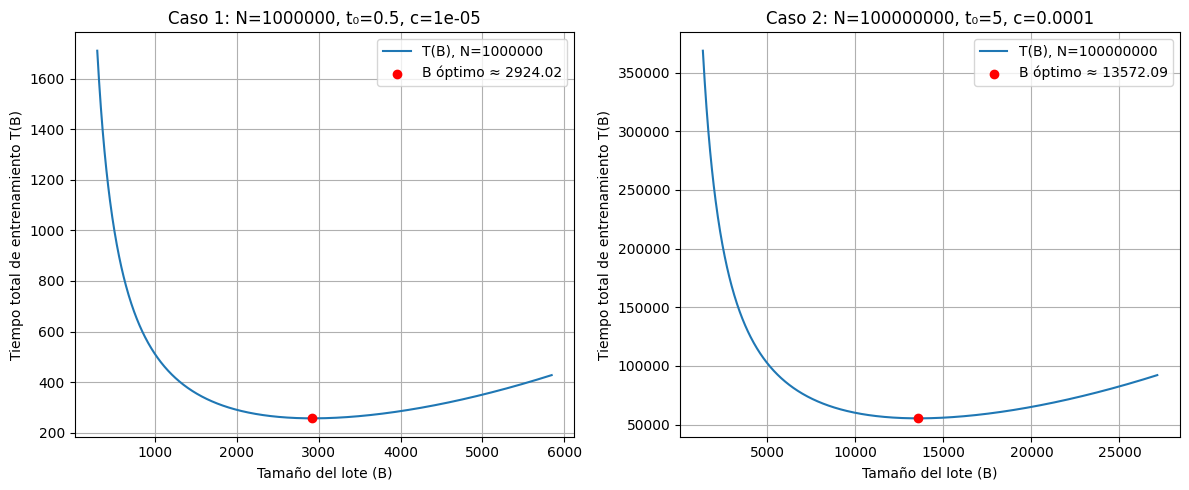

In [ ]:
# Convertir a función numérica
B_opt_func = lambdify((N_total, t0, c), B_opt)
T_B_func = lambdify((B, N_total, t0, c), T_B)

# Parámetros para dos casos
cases = [
    {'N_total': 10**6, 't0': 0.5, 'c': 10**-5},  # Dataset mediano, CNN pequeña en GPU
    {'N_total': 10**8, 't0': 5, 'c': 10**-4}     # Dataset grande, Transformer en GPU
]

# Graficar T(B) para cada caso
plt.figure(figsize=(12, 5))

for i, params in enumerate(cases):
    B_min = B_opt_func(**params)
    B_vals = np.linspace(max(1, B_min * 0.1), B_min * 2, 1000)
    T_vals = T_B_func(B_vals, **params)
    T_min = T_B_func(B_min, **params)
    
    plt.subplot(1, 2, i+1)
    plt.plot(B_vals, T_vals, label=f'T(B), N={params["N_total"]}')
    plt.scatter(B_min, T_min, color='red', zorder=3, label=f'B óptimo ≈ {B_min:.2f}')
    plt.xlabel('Tamaño del lote (B)')
    plt.ylabel('Tiempo total de entrenamiento T(B)')
    plt.legend()
    plt.title(f'Caso {i+1}: N={params["N_total"]}, t₀={params["t0"]}, c={params["c"]}')
    plt.grid()

plt.tight_layout()
plt.show()

Se observan las graficas para los dos casos de estudio, en el primer caso se tiene un valor de B optimo de 2924.02, en el segundo caso, que implica un dataset mas grande es de 13572.09.